In [5]:
%load_ext autoreload
%autoreload 2

import sys
import os

#needed to import utils.py
sys.path.append('../') 

import utils
import utils_preprocessing

import numpy as np
import pandas as pd

%matplotlib inline  

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---
### Read patient data 

In [2]:
#set the data directory
data_dir = os.path.abspath('../03_preprocessed_data/')
    
#set the name of CSV file
data_file = f'{data_dir}/patient.csv'

#read data and show some info
df = utils.read_csv(data_file)

print(df.shape[0])

df.head()

utils.show_columns_stats(df)

5271
subject_id................................ =  5271 rows (100.0%)     0 with NaN (  0.0%) Uniques=  5271 
Age....................................... =  5271 rows (100.0%)     0 with NaN (  0.0%) Uniques=   189 
Sex....................................... =  5271 rows (100.0%)     0 with NaN (  0.0%) Uniques=     2 
Symptoms_Onset_Delta...................... =  5271 rows (100.0%)     0 with NaN (  0.0%) Uniques=  1319 
Diagnosis_Delta........................... =  5271 rows (100.0%)     0 with NaN (  0.0%) Uniques=   962 
Site_Onset................................ =  5271 rows (100.0%)     0 with NaN (  0.0%) Uniques=     4 
Diagnosis_Delay........................... =  5271 rows (100.0%)     0 with NaN (  0.0%) Uniques=    70 
Age_at_Onset.............................. =  5271 rows (100.0%)     0 with NaN (  0.0%) Uniques=     5 
Event_Dead................................ =  5271 rows (100.0%)     0 with NaN (  0.0%) Uniques=     2 
Event_Dead_Time_from_Onset................ =  5271

Column Diagnosis_Delay  (5230 rows)   (DataType: float64)


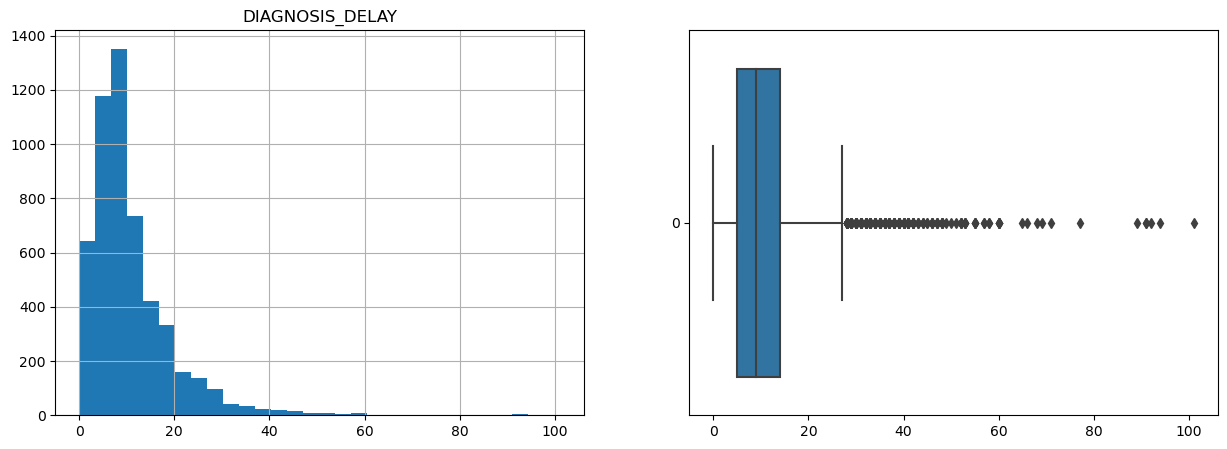

Column Diagnosis_Delay  (5271 rows)   (DataType: float64)


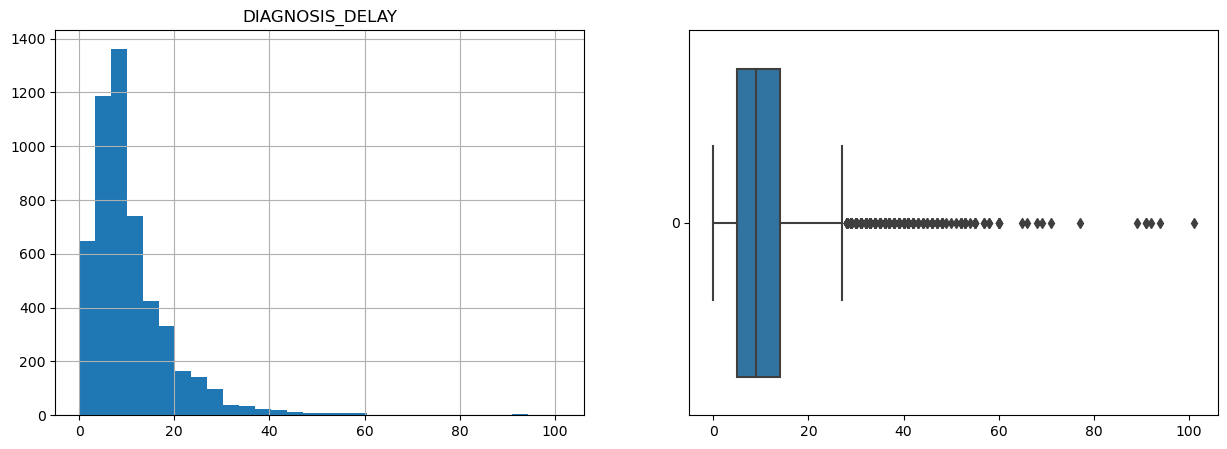

In [15]:
utils.plot_variable_distribution(df=df_old, column='Diagnosis_Delay', print_more_info=False)
utils.plot_variable_distribution(df=df, column='Diagnosis_Delay', print_more_info=False)

11675


,subject_id,Demographics_Delta,Age,Date_of_Birth,Ethnicity,Race_Americ_Indian_Alaska_Native,Race_Asian,Race_Black_African_American,Race_Hawaiian_Pacific_Islander,Race_Unknown,Race_Caucasian,Race_Other,Race_Other_Specify,Sex,El_Escorial
0,89,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,NaN
1,329,0.0,38.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Female,NaN
2,348,0.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Female,Probable Laboratory Supported
3,406,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,NaN
4,411,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,NaN


subject_id...................... = 11675 rows (100.0%)     0 with NaN (  0.0%) Uniques= 11675 
Demographics_Delta.............. = 11590 rows (99.27%)    85 with NaN ( 0.73%) Uniques=    12 
Age............................. =  8654 rows (74.12%)  3021 with NaN (25.88%) Uniques=   195 
Date_of_Birth................... =  1298 rows (11.12%) 10377 with NaN (88.88%) Uniques=  1235 
Ethnicity....................... =  2936 rows (25.15%)  8739 with NaN (74.85%) Uniques=     4 
Race_Americ_Indian_Alaska_Native =    12 rows (  0.1%) 11663 with NaN ( 99.9%) Uniques=     2 
Race_Asian...................... =    73 rows ( 0.63%) 11602 with NaN (99.37%) Uniques=     2 
Race_Black_African_American..... =   136 rows ( 1.16%) 11539 with NaN (98.84%) Uniques=     2 
Race_Hawaiian_Pacific_Islander.. =     1 rows ( 0.01%) 11674 with NaN (99.99%) Uniques=     2 
Race_Unknown.................... =    25 rows ( 0.21%) 11650 with NaN (99.79%) Uniques=     2 
Race_Caucasian.................. =  7581 rows (64.

/Users/papaiz/python-projects/_my_thesis/als_prognosis_using_ensemble_imbalance/02_ETL/../utils_preprocessing.py:1228: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_grouped = pd.read_csv(data_file, delimiter=',')


Column: Qty_Measurements_SVC  (DataType: float64)
N         = 11675 [Non-NaN: 11675]
Missingness: 0 (0.0%)
Min       = 0.00  
Max       = 16.00  
SE / Std  = 2.77  (Standard Error or Std.Dev.)
SEM       = 0.03  (Standard Error of the Mean) [Formula: Std.Dev/sqrt(N) => 2.77/sqrt(11675)] 
Mean      = 1.35 +/- 2.77 (Std.Dev.) [Precision of the Mean = 1.35 +/- 0.03 (SEM)] 
Median    = 0.00  
Mode      = 0.0
Variance  = 7.67 (Coefficient of Variation = 2.05)
Skewness  = 2.47 (Right-Skewed) (Highly Skewed) 
Kurtosis  = 6.35 (leptokurtic, point head appearance)(PS: a high kurtosis indicates too many outliers) 
Quartiles = [Q1: 25% < 0.00]   [Q2: 50% < 0.00]   [Q3: 75% < 1.00]
 -IQR     = 1.000 (Interquartile Range: IQR = Q3-Q1)
 -Outliers Threshold (IQR * +/-1.5):  [Lower = 0.000]   [Upper = 2.500]


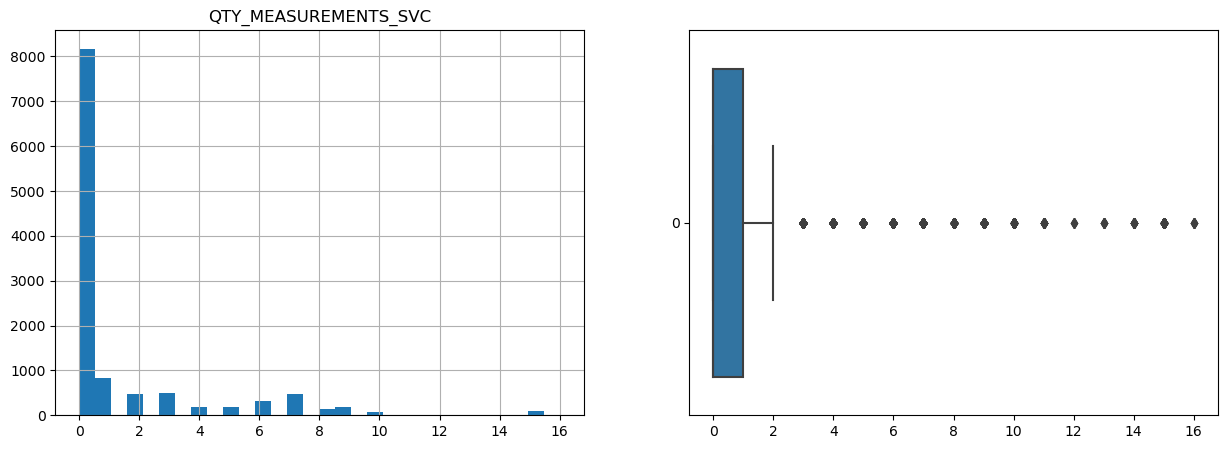

0.0     8174
1.0      829
3.0      496
7.0      480
2.0      471
6.0      316
4.0      188
5.0      184
9.0      179
8.0      136
15.0     102
10.0      76
11.0      17
14.0      13
13.0       6
16.0       5
12.0       3
Name: Qty_Measurements_SVC, dtype: int64

In [13]:
#set the data directory
data_dir = os.path.abspath('../01_raw_data')

#set the name of CSV file
data_file = f'{data_dir}/PROACT_DEMOGRAPHICS.csv'

#read data and show some info
df_raw = utils.read_csv(data_file)

print(df_raw.shape[0])

df_raw.head()


df_el_escorial = utils_preprocessing.preprocess_el_escorial(df_to_process=df_raw, data_dir=data_dir)

display(df_el_escorial.head())

utils.show_columns_stats(df_el_escorial)


df_measurements = utils_preprocessing.get_measurements(df_raw, data_dir)
utils.plot_variable_distribution(df=df_measurements, column='Qty_Measurements_SVC')

df_measurements.Qty_Measurements_SVC.value_counts()
